In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as st
import sklearn.datasets as dta
# Dependencies
import json
import requests


In [4]:
csv_path = "archive/imdb_top_1000.csv"

# Import the CSV into a pandas DataFrame
topmovies_df = pd.read_csv(csv_path, low_memory=False)


In [5]:
#drop null rows
topmovies_df=topmovies_df[["Genre","IMDB_Rating","Certificate","Gross"]]
no_null_topmovies_df = topmovies_df.dropna(how='any')
topmovies_df=no_null_topmovies_df
no_null_topmovies_df.count()

Genre          785
IMDB_Rating    785
Certificate    785
Gross          785
dtype: int64

In [7]:
cleaned_topmovies_df=topmovies_df[["Genre", "IMDB_Rating"]]
cleaned_topmovies_df.head()

,Genre,IMDB_Rating
0,Drama,9.3
1,"Crime, Drama",9.2
2,"Action, Crime, Drama",9.0
3,"Crime, Drama",9.0
4,"Crime, Drama",9.0
...,...,...
990,"Drama, War, Western",7.6
991,"Adventure, Comedy, War",7.6
992,"Animation, Adventure, Family",7.6
994,"Comedy, Music, Musical",7.6


In [8]:
genre_values=topmovies_df["Genre"].value_counts()
genre_values

Drama                        64
Drama, Romance               29
Comedy, Drama                26
Comedy, Drama, Romance       25
Biography, Drama, History    23
                             ..
Drama, History                1
Drama, Film-Noir, Mystery     1
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Adventure, Comedy, War        1
Name: Genre, Length: 178, dtype: int64

In [9]:
cleaned_topmovies_df.astype({'IMDB_Rating': 'str'}).dtypes

Genre          object
IMDB_Rating    object
dtype: object

In [10]:
result = cleaned_topmovies_df.set_index('IMDB_Rating').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')

result

,IMDB_Rating,Genre
0,9.3,Drama
1,9.2,Crime
2,9.2,Drama
3,9.0,Action
4,9.0,Crime
...,...,...
2005,7.6,Music
2006,7.6,Musical
2007,7.6,Drama
2008,7.6,Romance


In [11]:
genre_values=result["Genre"].value_counts()
genre_values

Drama        557
Comedy       184
Adventure    168
Crime        160
Action       152
Thriller     104
Romance      101
Biography     96
Mystery       81
Animation     66
Sci-Fi        59
Fantasy       56
Family        46
History       42
War           31
Music         31
Sport         19
Horror        18
Western       16
Musical       14
Film-Noir      9
Name: Genre, dtype: int64

In [12]:
#Count of Genre Types in alphabetical order (series)
genre_values_sorted = genre_values.sort_index(axis=0, ascending=True)
genre_values_sorted

Action       152
Adventure    168
Animation     66
Biography     96
Comedy       184
Crime        160
Drama        557
Family        46
Fantasy       56
Film-Noir      9
History       42
Horror        18
Music         31
Musical       14
Mystery       81
Romance      101
Sci-Fi        59
Sport         19
Thriller     104
War           31
Western       16
Name: Genre, dtype: int64

In [13]:
genre_values_sorted.count()

21

In [14]:
# list format of Count of Genre Types in alphabetical order
#genre_count=genre_values_sorted.tolist()
#genre_count
    

In [15]:
#Sum of the ratings in alphabetical order
grouped_genre_values = result.groupby("Genre")["IMDB_Rating"].sum()
grouped_genre_values


Genre
Action       1208.2
Adventure    1338.4
Animation     523.2
Biography     760.8
Comedy       1452.9
Crime        1273.9
Drama        4431.1
Family        363.2
Fantasy       442.7
Film-Noir      72.1
History       332.8
Horror        142.2
Music         245.2
Musical       110.8
Mystery       645.2
Romance       801.2
Sci-Fi        471.4
Sport         150.6
Thriller      824.1
War           248.8
Western       128.6
Name: IMDB_Rating, dtype: float64

In [16]:
grouped_genre_values.count()

21

In [17]:
#Sum of the ratings in alphabetial order into a dataframe, and column is renamed. 
grouped_genre_values_df=grouped_genre_values.to_frame()
grouped_genre_values_df.rename(columns={"IMDB_Rating": "Sum_Rating_By_Genre_Type"})
grouped_genre_values_df

,IMDB_Rating
Genre,
Action,1208.2
Adventure,1338.4
Animation,523.2
Biography,760.8
Comedy,1452.9
Crime,1273.9
Drama,4431.1
Family,363.2
Fantasy,442.7


In [18]:
type(grouped_genre_values_df)

pandas.core.frame.DataFrame

In [19]:
counted_genre_types_df=genre_values_sorted.to_frame()
counted_genre_types_df

,Genre
Action,152
Adventure,168
Animation,66
Biography,96
Comedy,184
Crime,160
Drama,557
Family,46
Fantasy,56
Film-Noir,9


In [21]:
counted_genre_types_df.count()

Genre    21
dtype: int64

In [22]:
type(counted_genre_types_df)

pandas.core.frame.DataFrame

In [23]:
joined_result = pd.concat([grouped_genre_values_df, counted_genre_types_df], axis=1, join='inner')
display(joined_result)

,IMDB_Rating,Genre
Action,1208.2,152
Adventure,1338.4,168
Animation,523.2,66
Biography,760.8,96
Comedy,1452.9,184
Crime,1273.9,160
Drama,4431.1,557
Family,363.2,46
Fantasy,442.7,56
Film-Noir,72.1,9


In [24]:
joined_result=joined_result.rename(columns={"Genre": "Genre_Count"})

In [25]:
joined_result = joined_result.rename_axis('Genre')


In [26]:
joined_result

,IMDB_Rating,Genre_Count
Genre,,
Action,1208.2,152
Adventure,1338.4,168
Animation,523.2,66
Biography,760.8,96
Comedy,1452.9,184
Crime,1273.9,160
Drama,4431.1,557
Family,363.2,46
Fantasy,442.7,56


In [27]:
total_IMDB_Rating_for_all_genre_types = joined_result["IMDB_Rating"].sum()
total_IMDB_Rating_for_all_genre_types

15967.4

In [28]:
total_Genre_Count_for_all_genre_types = joined_result["Genre_Count"].sum()
total_Genre_Count_for_all_genre_types 

2010

In [29]:
Averages=joined_result["IMDB_Rating"]/joined_result["Genre_Count"]



In [30]:

joined_result["Averages_By_Genre"] = Averages

In [31]:
joined_result

,IMDB_Rating,Genre_Count,Averages_By_Genre
Genre,,,
Action,1208.2,152,7.948684
Adventure,1338.4,168,7.966667
Animation,523.2,66,7.927273
Biography,760.8,96,7.925000
Comedy,1452.9,184,7.896196
Crime,1273.9,160,7.961875
Drama,4431.1,557,7.955296
Family,363.2,46,7.895652
Fantasy,442.7,56,7.905357


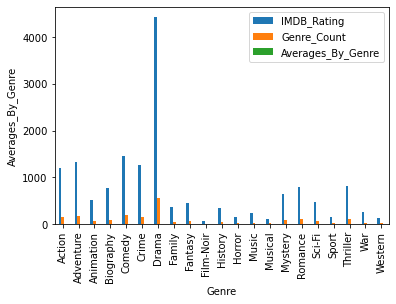

<Figure size 432x288 with 0 Axes>

In [40]:
# Create a bar chart based off of the group series from before
joined_result = joined_result.plot(kind='bar')

# Set the xlabel and ylabel using class methods
joined_result.set_xlabel("Genre")
joined_result.set_ylabel("Averages_By_Genre")


plt.show()
plt.tight_layout()

In [269]:
joined_result.describe()

,IMDB_Rating,Genre_Count,Averages_By_Genre
count,21.000000,21.000000,21.000000
mean,760.352381,95.714286,7.944880
std,946.792169,119.045009,0.042110
min,72.100000,9.000000,7.895652
25%,245.200000,31.000000,7.914286
50%,471.400000,59.000000,7.927273
75%,824.100000,104.000000,7.965432
max,4431.100000,557.000000,8.037500


In [270]:
joined_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Action to Western
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IMDB_Rating        21 non-null     float64
 1   Genre_Count        21 non-null     int64  
 2   Averages_By_Genre  21 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2+ KB


In [271]:
joined_result['Averages_By_Genre'].max()


8.037500000000001

In [272]:
#Genre with the highest IMDB_Rating Average
highest_genre=joined_result[ joined_result['Averages_By_Genre'] == joined_result['Averages_By_Genre'].max() ]
highest_genre

,IMDB_Rating,Genre_Count,Averages_By_Genre
Genre,,,
Western,128.6,16,8.0375


In [273]:
#Genre with the highest IMDB_Rating
highest_rating=joined_result[ joined_result['IMDB_Rating'] == joined_result['IMDB_Rating'].max() ]
highest_rating


,IMDB_Rating,Genre_Count,Averages_By_Genre
Genre,,,
Drama,4431.1,557,7.955296


In [274]:
Higthest_Genre_Count=joined_result[ joined_result['Genre_Count'] == joined_result['Genre_Count'].max() ]
Higthest_Genre_Count

,IMDB_Rating,Genre_Count,Averages_By_Genre
Genre,,,
Drama,4431.1,557,7.955296


In [275]:
gross_cleaned_topmovies_df=topmovies_df[["Genre", "Gross"]]
gross_cleaned_topmovies_df.head()

,Genre,Gross
0,Drama,"28,341,469"
1,"Crime, Drama","134,966,411"
2,"Action, Crime, Drama","534,858,444"
3,"Crime, Drama","57,300,000"
4,"Crime, Drama","4,360,000"


In [304]:
result_gross = gross_cleaned_topmovies_df.set_index('Gross').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')

result_gross

,Gross,Genre
0,"28,341,469",Drama
1,"134,966,411",Crime
2,"134,966,411",Drama
3,"534,858,444",Action
4,"534,858,444",Crime
...,...,...
2005,"13,780,024",Music
2006,"13,780,024",Musical
2007,"30,500,000",Drama
2008,"30,500,000",Romance


In [300]:
result_gross.dtypes

Gross    object
Genre    object
dtype: object

In [305]:
#result_gross.loc[:,"Gross"]=result_gross.loc[:,"Gross"].str.replace(",","").astype(float)

In [306]:
#Gross value is now in units of 100k in usd
Gross=result_gross["Gross"]/100000
result_gross["Gross"]=Gross.round(2)
result_gross

,Gross,Genre
0,283.41,Drama
1,1349.66,Crime
2,1349.66,Drama
3,5348.58,Action
4,5348.58,Crime
...,...,...
2005,137.80,Music
2006,137.80,Musical
2007,305.00,Drama
2008,305.00,Romance


In [277]:
#Count of Genre Types & Gross
genre_gross_values=result_gross["Genre"].value_counts()
genre_gross_values

Drama        557
Comedy       184
Adventure    168
Crime        160
Action       152
Thriller     104
Romance      101
Biography     96
Mystery       81
Animation     66
Sci-Fi        59
Fantasy       56
Family        46
History       42
War           31
Music         31
Sport         19
Horror        18
Western       16
Musical       14
Film-Noir      9
Name: Genre, dtype: int64

In [278]:
#Count of Genre Types & Gross in alphabetical order (series)
genre_gross_values_sorted = genre_values.sort_index(axis=0, ascending=True)
genre_gross_values_sorted

Action       152
Adventure    168
Animation     66
Biography     96
Comedy       184
Crime        160
Drama        557
Family        46
Fantasy       56
Film-Noir      9
History       42
Horror        18
Music         31
Musical       14
Mystery       81
Romance      101
Sci-Fi        59
Sport         19
Thriller     104
War           31
Western       16
Name: Genre, dtype: int64

In [307]:
#Sum of the gross in alphabetical order
grouped_genre_gross_values = result_gross.groupby("Genre")["Gross"].sum()
grouped_genre_gross_values


Genre
Action       219877.96
Adventure    281283.29
Animation     85731.37
Biography     53045.78
Comedy       121836.27
Crime         69426.56
Drama        273952.14
Family        44574.34
Fantasy       60825.44
Film-Noir       508.31
History       23881.49
Horror         8754.67
Music         10752.77
Musical        2827.91
Mystery       34529.42
Romance       43064.62
Sci-Fi        90240.14
Sport         10197.69
Thriller      64365.90
War           13629.71
Western        8563.01
Name: Gross, dtype: float64

In [308]:
#Sum of the gross in alphabetial order into a dataframe, and column is renamed. 
grouped_genre_gross_values_df=grouped_genre_gross_values.to_frame()
grouped_genre_gross_values_df

,Gross
Genre,
Action,219877.96
Adventure,281283.29
Animation,85731.37
Biography,53045.78
Comedy,121836.27
Crime,69426.56
Drama,273952.14
Family,44574.34
Fantasy,60825.44


In [281]:
#Sum of the genre by Genre Type
counted_genre_gross_values_df=genre_gross_values_sorted.to_frame()
counted_genre_gross_values_df

,Genre
Action,152
Adventure,168
Animation,66
Biography,96
Comedy,184
Crime,160
Drama,557
Family,46
Fantasy,56
Film-Noir,9


In [309]:
#Concat the two dataframes together to get the gross revenue by the each genre type
joined_gross_result = pd.concat([grouped_genre_gross_values_df,counted_genre_gross_values_df], axis=1, join='inner')
display(joined_gross_result)

,Gross,Genre
Action,219877.96,152
Adventure,281283.29,168
Animation,85731.37,66
Biography,53045.78,96
Comedy,121836.27,184
Crime,69426.56,160
Drama,273952.14,557
Family,44574.34,46
Fantasy,60825.44,56
Film-Noir,508.31,9


In [310]:
joined_gross_result=joined_gross_result.rename(columns={"Genre": "Genre_Count"})
joined_gross_result=joined_gross_result.rename(columns={"Gross": "Total_Gross"})
joined_gross_result = joined_gross_result.rename_axis('Genre')

In [311]:
joined_gross_result

,Total_Gross,Genre_Count
Genre,,
Action,219877.96,152
Adventure,281283.29,168
Animation,85731.37,66
Biography,53045.78,96
Comedy,121836.27,184
Crime,69426.56,160
Drama,273952.14,557
Family,44574.34,46
Fantasy,60825.44,56


In [320]:
Averages=joined_gross_result["Total_Gross"]/joined_gross_result["Genre_Count"]

In [322]:
joined_gross_result["Averages"] = Averages

In [330]:
joined_gross_result

,Total_Gross,Genre_Count,Averages
Genre,,,
Action,219877.96,152,1446.565526
Adventure,281283.29,168,1674.305298
Animation,85731.37,66,1298.960152
Biography,53045.78,96,552.560208
Comedy,121836.27,184,662.153641
Crime,69426.56,160,433.916000
Drama,273952.14,557,491.835081
Family,44574.34,46,969.007391
Fantasy,60825.44,56,1086.168571


In [229]:
joined_gross_result.dtypes

Total_Gross    object
Genre_Count     int64
dtype: object

In [331]:
highest_gross_genre=joined_gross_result[ joined_gross_result['Averages'] == joined_gross_result['Averages'].max() ]
highest_gross_genre


,Total_Gross,Genre_Count,Averages
Genre,,,
Adventure,281283.29,168,1674.305298


In [332]:
lowest_gross_genre=joined_gross_result[ joined_gross_result['Averages'] == joined_gross_result['Averages'].min() ]
lowest_gross_genre


,Total_Gross,Genre_Count,Averages
Genre,,,
Film-Noir,508.31,9,56.478889


In [339]:
grouped_certificate = topmovies_df.groupby("Certificate")["IMDB_Rating"].sum()
grouped_certificate


Certificate
A           1440.5
Approved      48.1
G             80.3
GP            15.7
PG           189.7
PG-13        303.5
Passed       185.4
R           1062.7
TV-PG          8.0
U           1593.8
U/A            7.6
UA          1296.1
Unrated        8.1
Name: IMDB_Rating, dtype: float64

In [335]:
grouped_certificate.count()

13

In [371]:
grouped_certificate_df=grouped_certificate.to_frame()
grouped_certificate_df.rename(columns={"IMDB_Rating": "Sum_Rating_By_Certificate_Type"})

,Sum_Rating_By_Certificate_Type
Certificate,
A,1440.5
Approved,48.1
G,80.3
GP,15.7
PG,189.7
PG-13,303.5
Passed,185.4
R,1062.7
TV-PG,8.0


In [358]:
genre_certificate_count=topmovies_df["Certificate"].value_counts()
genre_certificate_count





U           200
A           180
UA          163
R           135
PG-13        39
PG           24
Passed       23
G            10
Approved      6
GP            2
U/A           1
TV-PG         1
Unrated       1
Name: Certificate, dtype: int64

In [372]:
grouped_certificate_count_sorted = genre_certificate_count.sort_index(axis=0, ascending=True)
grouped_certificate_count_sorted


certificate_count_df=grouped_certificate_count_sorted.to_frame()
certificate_count_df



,Certificate
A,180
Approved,6
G,10
GP,2
PG,24
PG-13,39
Passed,23
R,135
TV-PG,1
U,200


In [373]:
joined_certificate_result = pd.concat([grouped_certificate_df,certificate_count_df], axis=1, join='inner')
display(joined_certificate_result)

,IMDB_Rating,Certificate
A,1440.5,180
Approved,48.1,6
G,80.3,10
GP,15.7,2
PG,189.7,24
PG-13,303.5,39
Passed,185.4,23
R,1062.7,135
TV-PG,8.0,1
U,1593.8,200


In [415]:
joined_certificate_result=joined_certificate_result.rename(columns={"IMDB_Rating": "Total Rating"})
joined_certificate_result=joined_certificate_result.rename(columns={"Certificate": "Certificate Count"})
joined_certificate_result = joined_certificate_result.rename_axis('Certificate')

In [379]:
Averages_Certificate=joined_certificate_result["Total Rating"]/joined_certificate_result["Certificate Count"]

In [380]:
joined_certificate_result["Averages"] = Averages_Certificate

In [383]:
joined_certificate_result

,Total Rating,Certificate Count,Averages
Certificate,,,
A,1440.5,180,8.002778
Approved,48.1,6,8.016667
G,80.3,10,8.030000
GP,15.7,2,7.850000
PG,189.7,24,7.904167
PG-13,303.5,39,7.782051
Passed,185.4,23,8.060870
R,1062.7,135,7.871852
TV-PG,8.0,1,8.000000


In [386]:
highest_avg_certificate_rating=joined_certificate_result[ joined_certificate_result['Averages'] == joined_certificate_result['Averages'].max() ]
highest_avg_certificate_rating


,Total Rating,Certificate Count,Averages
Certificate,,,
Unrated,8.1,1,8.1


In [387]:
lowest_avg_certificate_rating=joined_certificate_result[ joined_certificate_result['Averages'] == joined_certificate_result['Averages'].min() ]
lowest_avg_certificate_rating


,Total Rating,Certificate Count,Averages
Certificate,,,
U/A,7.6,1,7.6


In [397]:
Gross=result_gross["Gross"]/100000
result_gross["Gross"]=Gross.round(2)


grouped_certificate_gross = topmovies_df.groupby("Certificate")["Gross"].sum()
grouped_certificate_gross

Certificate
A           1.149968e+10
Approved    4.169408e+07
G           4.959633e+08
GP          1.417916e+06
PG          4.293186e+08
PG-13       1.440966e+09
Passed      1.250177e+08
R           3.482136e+09
TV-PG       1.066620e+05
U           1.744932e+10
U/A         2.602096e+07
UA          2.137679e+10
Unrated     3.000000e+05
Name: Gross, dtype: float64

In [ ]:
#Gross value is now in units of 100k in usd
#Gross=result_gross["Gross"]/100000
#result_gross["Gross"]=Gross.round(2)
#result_gross

In [ ]:
#result_gross.loc[:,"Gross"]=result_gross.loc[:,"Gross"].str.replace(",","").astype(float)

In [400]:
grouped_certificate_gross_df=grouped_certificate_gross.to_frame()
grouped_certificate_gross_df

,Gross
Certificate,
A,1.149968e+10
Approved,4.169408e+07
G,4.959633e+08
GP,1.417916e+06
PG,4.293186e+08
PG-13,1.440966e+09
Passed,1.250177e+08
R,3.482136e+09
TV-PG,1.066620e+05


In [398]:
certificate_count_df

,Certificate
A,180
Approved,6
G,10
GP,2
PG,24
PG-13,39
Passed,23
R,135
TV-PG,1
U,200


In [401]:
joined_certificate_gross_result = pd.concat([grouped_certificate_gross_df,certificate_count_df], axis=1, join='inner')
display(joined_certificate_gross_result)

,Gross,Certificate
A,1.149968e+10,180
Approved,4.169408e+07,6
G,4.959633e+08,10
GP,1.417916e+06,2
PG,4.293186e+08,24
PG-13,1.440966e+09,39
Passed,1.250177e+08,23
R,3.482136e+09,135
TV-PG,1.066620e+05,1
U,1.744932e+10,200


In [403]:
joined_certificate_gross_result=joined_certificate_gross_result.rename(columns={"Gross": "Total Gross"})
joined_certificate_gross_result=joined_certificate_gross_result.rename(columns={"Certificate": "Certificate Count"})
joined_certificate_gross_result = joined_certificate_gross_result.rename_axis('Certificate')
joined_certificate_gross_result

,Total Gross,Certificate Count
Certificate,,
A,1.149968e+10,180
Approved,4.169408e+07,6
G,4.959633e+08,10
GP,1.417916e+06,2
PG,4.293186e+08,24
PG-13,1.440966e+09,39
Passed,1.250177e+08,23
R,3.482136e+09,135
TV-PG,1.066620e+05,1


In [405]:
Averages_Certificate_Gross=joined_certificate_gross_result["Total Gross"]/joined_certificate_gross_result["Certificate Count"]

In [406]:
joined_certificate_gross_result["Averages"] = Averages_Certificate_Gross

In [407]:
joined_certificate_gross_result

,Total Gross,Certificate Count,Averages
Certificate,,,
A,1.149968e+10,180,6.388713e+07
Approved,4.169408e+07,6,6.949014e+06
G,4.959633e+08,10,4.959633e+07
GP,1.417916e+06,2,7.089580e+05
PG,4.293186e+08,24,1.788827e+07
PG-13,1.440966e+09,39,3.694786e+07
Passed,1.250177e+08,23,5.435554e+06
R,3.482136e+09,135,2.579360e+07
TV-PG,1.066620e+05,1,1.066620e+05


In [408]:
highest_avg_certificate_gross=joined_certificate_gross_result[joined_certificate_gross_result['Averages'] == joined_certificate_gross_result['Averages'].max() ]
highest_avg_certificate_gross


,Total Gross,Certificate Count,Averages
Certificate,,,
UA,2.137679e+10,163,1.311460e+08


In [417]:
#Averages in units of 100k in usd
reduced_averages=joined_certificate_gross_result["Averages"]/100000
joined_certificate_gross_result["Averages"]=reduced_averages
joined_certificate_gross_result

,Total Gross,Certificate Count,Averages
Certificate,,,
A,1.149968e+10,180,638.871328
Approved,4.169408e+07,6,69.490140
G,4.959633e+08,10,495.963257
GP,1.417916e+06,2,7.089580
PG,4.293186e+08,24,178.882733
PG-13,1.440966e+09,39,369.478571
Passed,1.250177e+08,23,54.355537
R,3.482136e+09,135,257.935994
TV-PG,1.066620e+05,1,1.066620


In [409]:
lowest_avg_certificate_gross=joined_certificate_gross_result[joined_certificate_gross_result['Averages'] == joined_certificate_gross_result['Averages'].min() ]
lowest_avg_certificate_gross

,Total Gross,Certificate Count,Averages
Certificate,,,
TV-PG,106662.0,1,106662.0
